In [1]:
import pandas as pd
import numpy as np
import  scipy.stats as st
import pingouin as pg
from statsmodels. stats.multicomp import MultiComparison
import statsmodels.formula.api as smf

import seaborn as sns
import matplotlib as plt
%matplotlib inline

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
sns.set_theme(
    font_scale = 2,                         # размер шрифта
    style      = 'whitegrid',               # стиль поля графика
    rc         = {'figure.figsize':(20,10)}  # размер фигуры
)

In [ ]:
delivery = pd.read_csv('/Users/varya_hai/Karpov.courses/5_task_1.csv')
delivery.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


In [4]:
delivery.shape

(30000, 3)

In [5]:
A = delivery.query('group=="A"').events
B = delivery.query('group=="B"').events
C = delivery.query('group=="C"').events

# 1

Проверим равенство дисперсий

**Нулевая гипотеза**: дисперсии внутри групп одинаковые (гомогенные)

In [6]:
st.levene(A,B,C) # так как р-значение>0.05, то нулевую гипотезу не отклоняем

LeveneResult(statistic=2.2622596339318037, pvalue=0.1041327199523974)

# 2

Проверим, распределены ли данные нормально.

**Нулевая гипотеза**: данные распределены нормально

In [7]:
pg.normality(data=delivery,dv='events',group='group',method='shapiro') #если слишком много наблюдений, то лучше НЕ использовать

/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
/Users/varya_hai/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
group,,,
A,0.998933,0.000004,False
B,0.999016,0.000011,False
C,0.998920,0.000003,False


In [8]:
pg.normality(data=delivery,dv='events',group='group',method='normaltest')

,W,pval,normal
group,,,
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


# 3

Вот теперь можно применить однофакторный дисперсионный анализ!

**Нулевая гипотеза**: группы значимо НЕ различаются

In [9]:
st.f_oneway(A,B,C) #p-value<0.05, значит, группы различаются значимо

F_onewayResult(statistic=2886.166657438961, pvalue=0.0)

In [10]:
pg.anova(data=delivery,dv='events',between='group')

,Source,ddof1,ddof2,F,p-unc,np2
0,group,2,29997,2886.166657,0.0,0.161377


# 4

Так как группы значимо отличаются и их три, мы должны понять, какие конкретно отличаются друг от друга

Чтобы это узнать, воспользуемся тестом Тьюки

In [11]:
MultiComparison(delivery.events,delivery.group).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
A,B,8.034,0.0,7.7038,8.3642,True
A,C,-2.1093,0.0,-2.4395,-1.7791,True
B,C,-10.1433,0.0,-10.4735,-9.8131,True


In [12]:
pg.pairwise_tukey(data=delivery,dv='events',between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806229
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.210514
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.024138


<AxesSubplot:xlabel='group', ylabel='events'>

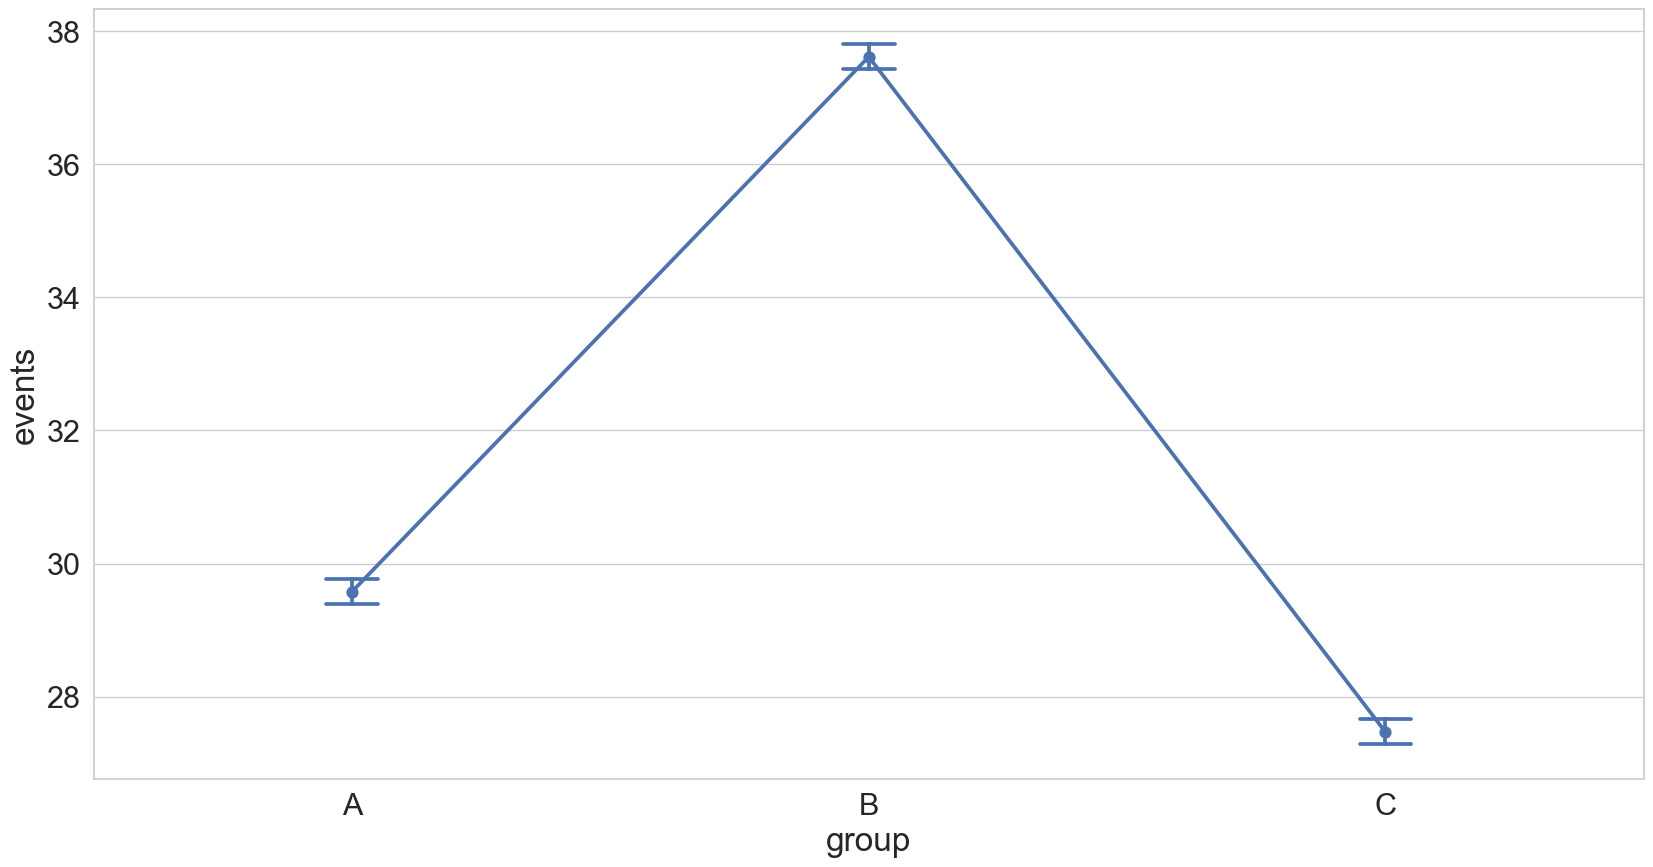

In [13]:
sns.pointplot(x='group',y='events',data=delivery,capsize=.1)

# Кнопки заказа. Какие лучше - старые или новые?

In [ ]:
df2 = pd.read_csv('/Users/varya_hai/Karpov.courses/5_task_2.csv')
df2.head()

,id,group,segment,events
0,83440,test,high,78.0
1,96723,test,high,71.0
2,68719,test,high,80.0
3,50399,test,high,80.0
4,95613,test,high,78.0


Тут нужно применить многофакторный дисперсионный анализ, так как от вида кнопки (segment) может зависеть количество заказанных блюд (events)

In [15]:
df2.groupby(['group','segment']).agg({'events':['mean','median','std']}).round(2).reset_index()

group segment events             
                     mean median   std
0  control    high  59.97   60.0  7.81
1  control     low  20.03   20.0  4.47
2     test    high  69.94   70.0  8.40
3     test     low  33.03   33.0  5.72

In [16]:
pg.anova(data=df2,dv='events',between=['group','segment'])

,Source,SS,DF,MS,F,p-unc,np2
0,group,3.837195e+06,1.0,3.837195e+06,112031.864119,0.000000e+00,0.528383
1,segment,2.362480e+07,1.0,2.362480e+07,689756.377484,0.000000e+00,0.873383
2,group * segment,3.664244e+04,1.0,3.664244e+04,1069.823273,2.060261e-233,0.010585
3,Residual,3.424956e+06,99996.0,3.425093e+01,NaN,NaN,NaN


In [17]:
df2['combination']=df2.group+'\\'+df2.segment

In [18]:
df2.head()

,id,group,segment,events,combination
0,83440,test,high,78.0,test\high
1,96723,test,high,71.0,test\high
2,68719,test,high,80.0,test\high
3,50399,test,high,80.0,test\high
4,95613,test,high,78.0,test\high


In [19]:
pg.pairwise_tukey(data=df2,dv='events',between='combination')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,control\high,control\low,59.970800,20.031575,39.939225,0.065432,610.391461,0.0,7.521612
1,control\high,test\high,59.970800,69.938500,-9.967700,0.082766,-120.432523,0.0,-1.228989
2,control\high,test\low,59.970800,33.025925,26.944875,0.065432,411.798717,0.0,4.350026
3,control\low,test\high,20.031575,69.938500,-49.906925,0.065432,-762.727892,0.0,-9.091140
4,control\low,test\low,20.031575,33.025925,-12.994350,0.041383,-314.002699,0.0,-2.530414
5,test\high,test\low,69.938500,33.025925,36.912575,0.065432,564.135148,0.0,5.814008


In [20]:
MultiComparison(df2.events,df2.combination).tukeyhsd().summary()

group1,group2,meandiff,p-adj,lower,upper,reject
control\high,control\low,-39.9392,0.0,-40.1073,-39.7711,True
control\high,test\high,9.9677,0.0,9.7551,10.1803,True
control\high,test\low,-26.9449,0.0,-27.113,-26.7768,True
control\low,test\high,49.9069,0.0,49.7388,50.075,True
control\low,test\low,12.9944,0.0,12.888,13.1007,True
test\high,test\low,-36.9126,0.0,-37.0807,-36.7445,True
